# SD212: Graph mining
## Lab 5: Hierarchical clustering

In this lab, you will learn to analyse the hierarchical structure of a graph. 

## Import

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np
from scipy import sparse

In [3]:
!pip install scikit-network

     |████████████████████████████████| 2.3MB 2.8MB/s 


In [4]:
# if you get any error, please update scikit-network!
from sknetwork.data import load_netset, karate_club
from sknetwork.hierarchy import LouvainHierarchy, BiLouvainHierarchy, Paris, BiParis, cut_straight
from sknetwork.ranking import PageRank, BiPageRank
from sknetwork.linalg import normalize
from sknetwork.utils import membership_matrix
from sknetwork.visualization import svg_graph, svg_digraph, svg_dendrogram

## Data

We will work on the following graphs (see the [NetSets](https://graphs.telecom-paristech.fr/Home_page.html#netsets-section) collection for details):
* Openflights (graph)
* WikiVitals (digraph)
* Cinema (bigraph)

In [5]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')
cinema = load_netset('cinema')

## 1. Graphs

## Karate Club


The [karate club graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) provides ground-truth clusters.

In [81]:
graph = karate_club(True)

In [82]:
adjacency = graph.adjacency
position = graph.position
labels_true = graph.labels

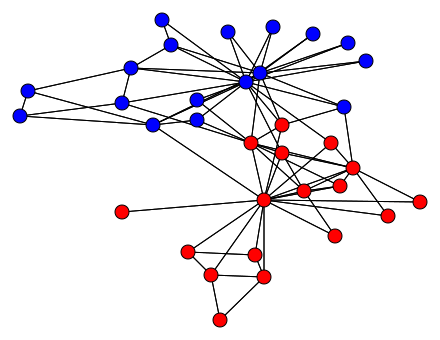

In [83]:
image = svg_graph(adjacency, position, labels=labels_true)
SVG(image)

In [ ]:
len(labels_true)

34

## To do

* Cluster the graph by the hierarchical Louvain algorithm.
* Display the dendrogram.
* How many clusters are there at depth 2?

In [9]:
louvain = LouvainHierarchy()

In [10]:
dendrogram = louvain.fit_transform(adjacency)

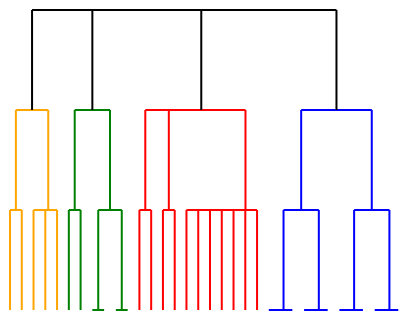

In [11]:
image = svg_dendrogram(dendrogram)
SVG(image)

4

## To do

* Cluster the graph by the Paris algorithm.
* Display the dendrogram.
* Display the graph with the top-2 clusters. How many nodes are misclassified compared to the ground truth?
* Display the graph with the top-4 clusters and the corresponding aggregate dendrogram.

**Hint:** Check the parameters of the function ``cut_straight``.

In [84]:
paris = Paris()

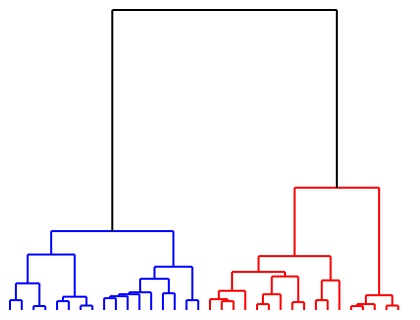

In [85]:
dendrogram = paris.fit_transform(adjacency)
image = svg_dendrogram(dendrogram)
SVG(image)

In [86]:
labels, dendrogram_aggregate = cut_straight(dendrogram, n_clusters=2, return_dendrogram=True)

In [17]:
np.abs(labels-labels_true)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [87]:
labels, dendrogram_aggregate = cut_straight(dendrogram, n_clusters=3, return_dendrogram=True)

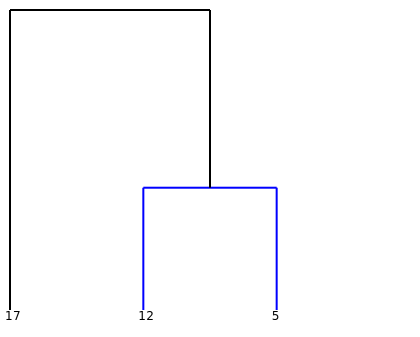

In [88]:
_, counts = np.unique(labels, return_counts=True)
image = svg_dendrogram(dendrogram_aggregate, names=counts, rotate_names=False)
SVG(image)


## Openflights


In [18]:
graph = openflights

In [19]:
adjacency = graph.adjacency
position = graph.position
names = graph.names

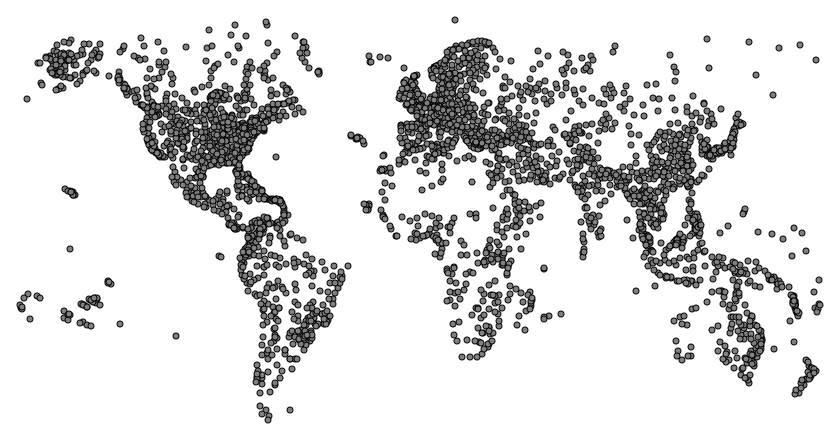

In [20]:
image = svg_graph(adjacency, position, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

## To do

* Display the same world map with the top-10 clusters found by Paris.
* Display the aggregate dendrogram formed by the top-50 clusters found by Paris, with the name of the top airport  (in traffic) of each cluster. <br>**Hint:** Use the parameters ``rotate``, ``n_clusters`` and ``scale`` for better visualization of the dendrogram.

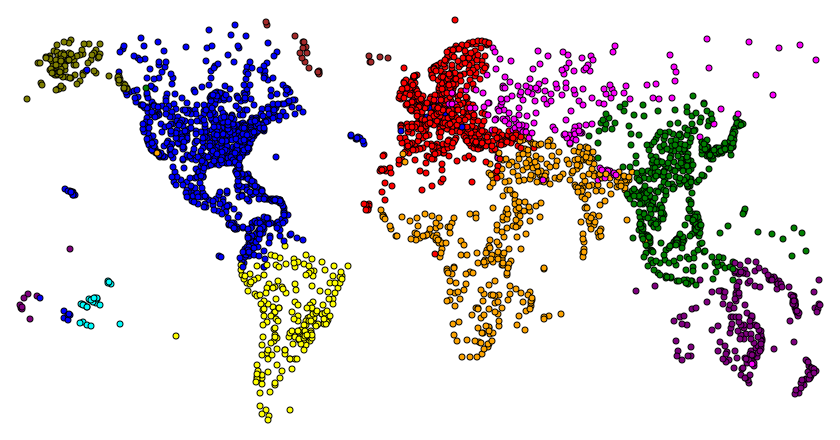

In [ ]:
paris = Paris()
dendrogram = paris.fit_transform(adjacency)
labels, dendrogram_aggregate = cut_straight(dendrogram, n_clusters=10, return_dendrogram=True)
image = svg_graph(adjacency, position, labels=labels, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

In [ ]:
labels, dendrogram_aggregate = cut_straight(dendrogram, n_clusters=50, return_dendrogram=True)

In [ ]:
A = adjacency.toarray()
degrees = np.dot(A,np.ones(len(names)))

In [ ]:
new_names = []
for i in range(50):
  indexes = np.argwhere(labels==i).flatten()
  print(degrees[indexes].flatten())
  b=np.argmax(degrees[indexes])
  c=indexes[b]
  print(c)
  new_names.append(names[c])

[  5.  10.  18.  13.  95.  14.  32.  17.   5.   4.  60.   2.  29.   3.
   2.   2.   6.   1.   1.   6.   6.   4.   6.   2.   5.   3.   3.   1.
   3.   1.  25.   2.   2.   1.   2.   3.   2.  10.  80.  26.  40.  14.
  31.   4.  10.   2.   4.  13.   1.   1.   2.   3.   6.  94.  30.   7.
   6.   5.   1.   8.  60.   2.   7.   3.   2.   3. 139.   5.   6.   1.
  31.   5.   1.   2.   5.  23.   2.   4.   3.   1.   8.   9.  14.   1.
   4.   5.   1.   7.   7.   1.   1.   4.   2.   1.  10.   3.   6.   4.
   3.   5.   4.   8.   3.   8.   2.   2.   7.   5.  15.  11.   3.   1.
   2.   3.   3.   4.   1.   5.   1.   2.   2.   2.   8.   5.   9.   7.
   7.   6.   2.   1.   4.   1.   3.   3.  15.   5.   3.   2.   1.   1.
   4.   4.   5.   1.   3.   3.   4.   6.   4.   1.   9.   4.   3.   8.
   1.   5.   1.   3.   4.   3.   6.   5.   4.   1.   1.   1.   1.   1.
   6.   2.   1.   4.   6.   5.   8.   4.   1.   6.   1.   6.   4.   5.
   1.   1.   2.   7.   2.   2.   4.   4.   2.   2.   1.]
1615
[ 47.   2.   5.

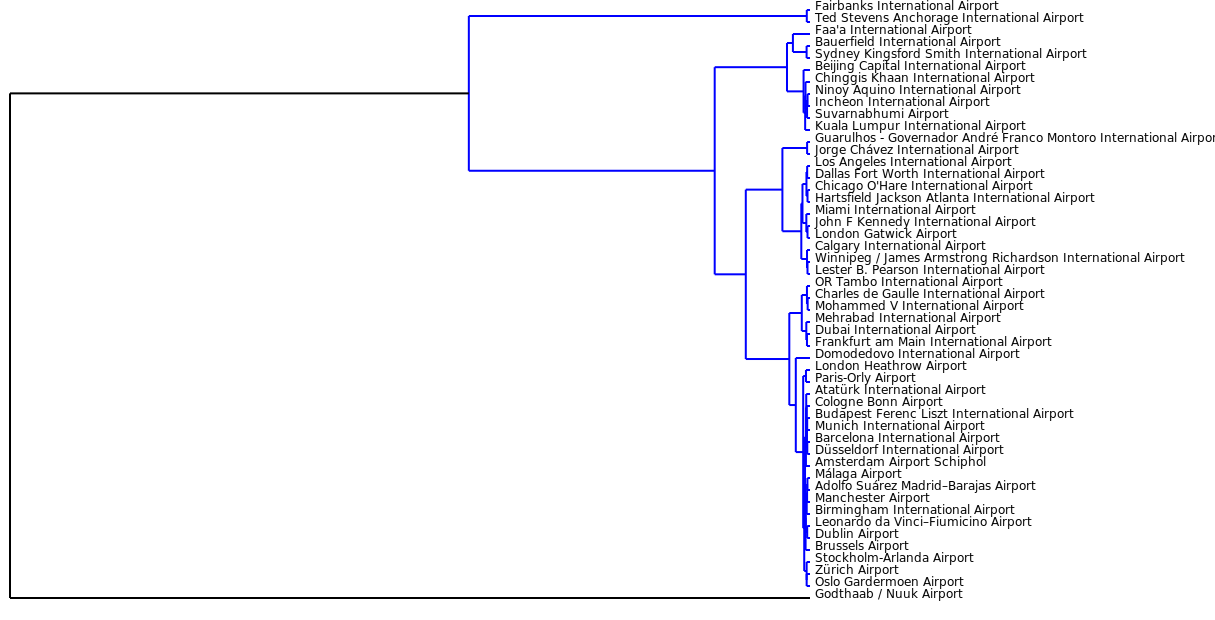

In [ ]:
image = svg_dendrogram(dendrogram_aggregate, names=new_names, rotate=True,width=800,height=600)
SVG(image)


## 2. Digraphs

## Wikipedia Vitals

## To do

* Cluster the graph by the Paris algorithm.
* Give the size and top-5 articles of each of the top-25 clusters found by Paris.
* Display the aggregate dendrogram formed by the top-25 clusters, with the name of the top article of each cluster.

**Hint:** Use Personalized PageRank to get the top nodes of a cluster.

In [21]:
graph = wikivitals

In [22]:
adjacency = graph.adjacency
names = graph.names

In [23]:
dendrogram = paris.fit_transform(adjacency)
image = svg_dendrogram(dendrogram,rotate=True)
SVG(image)

In [25]:
labels, dendrogram_aggregate = cut_straight(dendrogram, n_clusters=25, return_dendrogram=True)

In [26]:
A = adjacency.toarray()
degrees = np.dot(A,np.ones(len(names)))

In [49]:
pagerank = PageRank(damping_factor=0.5)

In [50]:
new_names = []
for i in range(25):
  seeds = np.zeros(len(names))
  indexes = np.argwhere(labels==i).flatten()
  seeds[indexes]=1
  scores = pagerank.fit_transform(adjacency,seeds)
  b=np.argsort(-scores)[:5]
  new_names.append(names[b])

In [51]:
new_names = np.array(new_names)

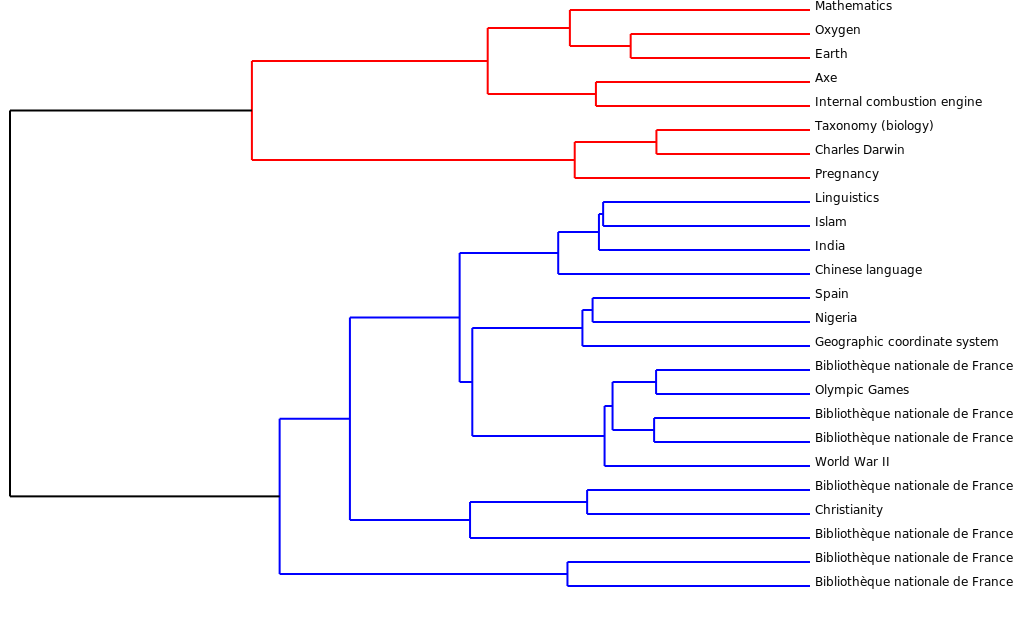

In [52]:
image = svg_dendrogram(dendrogram_aggregate, names=new_names[:,0], rotate=True,width=800,height=600)
SVG(image)


In [ ]:
i=0
while dendrogram[i][1]!=10000:
    i+=1

In [ ]:
cut_straight(dendrogram=dendrogram,n_clusters=12)[10000]

8

In [ ]:
len(dendrogram)

10011

In [ ]:
10011-i

9238

In [ ]:
dendrogram

array([[6.79100000e+03, 6.79000000e+03, 2.45525560e-05, 2.00000000e+00],
       [6.80200000e+03, 6.80300000e+03, 2.50536280e-05, 2.00000000e+00],
       [1.33100000e+03, 1.34700000e+03, 2.70579185e-05, 2.00000000e+00],
       ...,
       [2.00190000e+04, 2.00130000e+04, 7.78618322e-01, 5.84400000e+03],
       [2.00150000e+04, 2.00110000e+04, 8.19335622e-01, 4.16800000e+03],
       [2.00210000e+04, 2.00200000e+04, 1.17446294e+00, 1.00120000e+04]])

In [ ]:
np.argwhere(names=='Riverboat')

array([[10000]])

In [ ]:
len(names)

10012

## To do

* Complete the following function that returns the nested clusters from a target node in a dendrogram.
* Give the size and top-5 articles of each nested cluster from the article **Riverboat**.

In [53]:
def get_cluster_nested(dendrogram: np.ndarray, node: int): 
    '''Get nested clusters of a node.
    
    Parameters
    ----------
    dendrogram: 
        Dendrogram
    node:
        Target node
        
    Returns
    -------
    cluster_nested: list of list
        Nested clusters, as a partition of the set of nodes (see the example below). 
        
    Example
    -------
    >>> dendrogram = np.array([[0, 1, 1, 2], [2, 3, 1, 2], [4, 5, 1, 4]])
    >>> get_cluster_nested(dendrogram, 0)
    [[0], [1], [2, 3]]
    '''
    n = dendrogram.shape[0] + 1
    
    cluster = {i: [i] for i in range(n)}
    cluster_nested = [[node]]
    cluster_index = node
    
    for t in range(n - 1):
        i = int(dendrogram[t][0])
        j = int(dendrogram[t][1])
        # to be completed
        cluster[n + t] = cluster.pop(i) + cluster.pop(j)
    
    return cluster_nested

In [54]:
node = 10000

In [55]:
names[node]

'Riverboat'

In [56]:
get_cluster_nested(dendrogram,node)

[[10000]]

## 3. Bigraphs

## Cinema

In [57]:
graph = cinema

In [58]:
biadjacency = graph.biadjacency
movies = graph.names_row
actors = graph.names_col

## To do

* Get the hierarchy of actors and the hierarchy of movies by the Paris algorithm. 
* Give the size and top-3 movies of each of the top-20 clusters of movies.
* Give the size and top-3 actors of each of the top-20 clusters of actors.
* Give the size and top-3 actors of each nested cluster of **Catherine Deneuve**. 

**Hint:** Use Personalized BiPageRank to get the top nodes of a cluster.

In [59]:
biparis = BiParis()

In [60]:
biparis.fit(biadjacency)

BiParis(weights='degree', reorder=True)

In [62]:
dendrogram_movies = biparis.dendrogram_row_

In [63]:
dendrogram_actors = biparis.dendrogram_col_

In [72]:
labels, dendrogram_aggregate = cut_straight(dendrogram_movies, n_clusters=20, return_dendrogram=True)

In [73]:
bipagerank = BiPageRank(damping_factor=0.5)

In [74]:
new_names = []
for i in range(20):
  seeds = np.zeros(len(movies))
  indexes = np.argwhere(labels==i).flatten()
  seeds[indexes]=1
  scores = bipagerank.fit_transform(biadjacency,seeds)
  b=np.argsort(-scores)[:5]
  new_names.append(movies[b])
new_names = np.array(new_names)

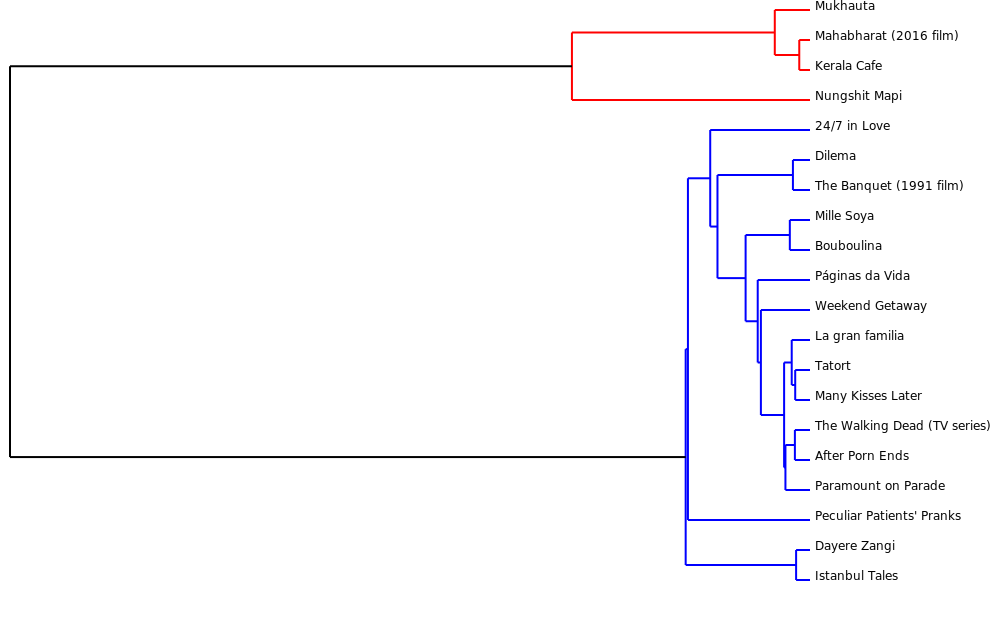

In [75]:
image = svg_dendrogram(dendrogram_aggregate, names=new_names[:,0], rotate=True,width=800,height=600)
SVG(image)


In [79]:
labels, dendrogram_aggregate = cut_straight(dendrogram_actors, n_clusters=20, return_dendrogram=True)
new_names = []
for i in range(20):
  seeds = np.zeros(len(actors))
  indexes = np.argwhere(labels==i).flatten()
  seeds[indexes]=1
  bipagerank.fit(biadjacency,seeds_col=seeds)
  scores = bipagerank.scores_col_
  b=np.argsort(-scores)[:5]
  new_names.append(actors[b])
new_names = np.array(new_names)

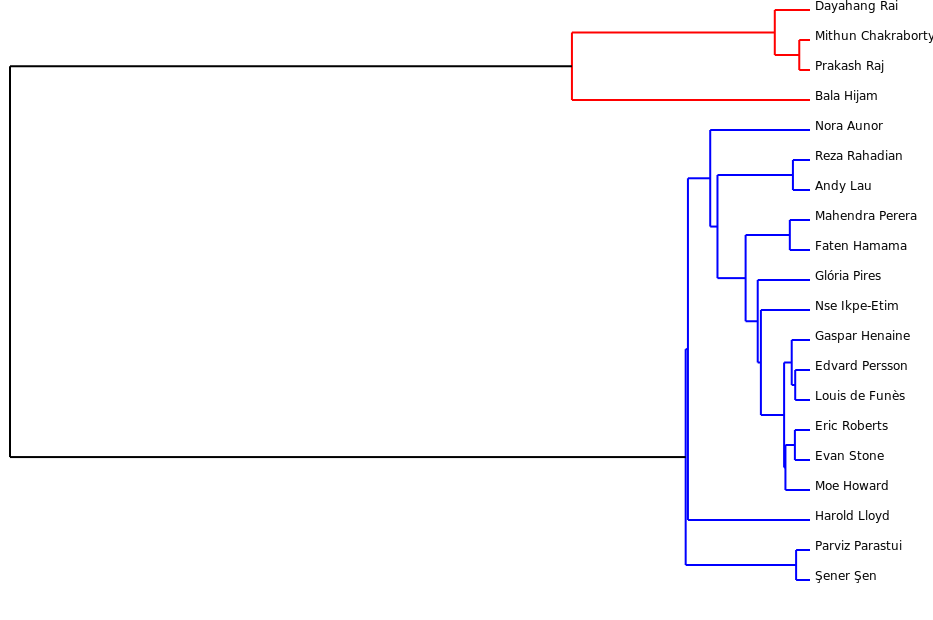

In [80]:
image = svg_dendrogram(dendrogram_aggregate, names=new_names[:,0], rotate=True,width=800,height=600)
SVG(image)


In [ ]:
labels, dendrogram_aggregate = cut_straight(dendrogram, n_clusters=50, return_dendrogram=True)

In [ ]:
np.unique(labels,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 array([649, 541, 483, 394, 378, 362, 351, 325, 315, 313, 291, 290, 289,
        287, 280, 252, 244, 235, 225, 210, 206, 205, 201, 200, 199, 190,
        189, 180, 172, 170, 166, 147, 140, 135, 131, 130,  97,  93,  84,
         54,  49,  44,  37,  35,  27,   9,   5,   1,   1,   1]))

In [ ]:
deneuve = 2173

In [ ]:
actors[deneuve]